In [8]:
import pandas as pd
#import plotnine as p9
import matplotlib.pyplot as plt
import numpy as np

In [29]:
hippo = pd.read_csv("motrpac_pass1b-06_t52-hippocampus_epigen-atac-seq_counts.txt.gz", sep = "\t")
hippo.shape

(1213087, 55)

In [58]:
hippo_counts.sum(0).mean()

20719929.192307692

In [59]:
hippo_counts = np.array(hippo.iloc[:,3:])
hippo_norm = 2e8 * hippo_counts / hippo_counts.sum(0) # normalize st each sample has 20M reads

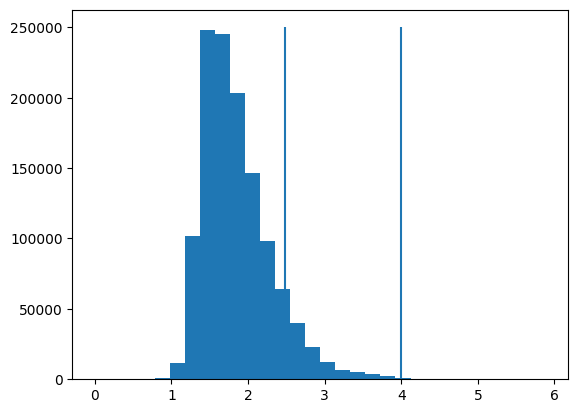

In [80]:
peak_counts_hippo = hippo_norm.mean(1)
lower_thres = 300
upper_thres = 1e4
plt.hist(np.log10(peak_counts_hippo + 1),30)
plt.vlines(np.log10(lower_thres+1), ymin = 0, ymax = 250000)
plt.vlines(np.log10(upper_thres+1), ymin = 0, ymax = 250000)
plt.show()

In [73]:
np.sum(np.logical_and(peak_counts_hippo > lower_thres, peak_counts_hippo < upper_thres))

113541

In [81]:
gastro = pd.read_csv("motrpac_pass1b-06_t55-gastrocnemius_epigen-atac-seq_counts.txt.gz", sep = "\t")
gastro_counts = np.array(gastro.iloc[:,3:])
gastro_norm = 2e8 * gastro_counts / gastro_counts.sum(0) # normalize st each sample has 20M reads

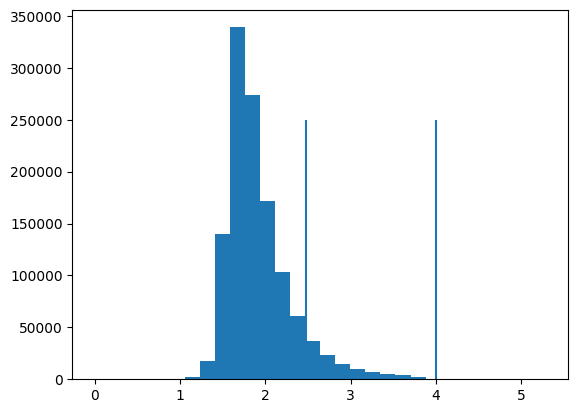

In [84]:
peak_counts_gastro = gastro_norm.mean(1)
plt.hist(np.log10(peak_counts_gastro + 1),30)
plt.vlines(np.log10(lower_thres+1), ymin = 0, ymax = 250000)
plt.vlines(np.log10(upper_thres+1), ymin = 0, ymax = 250000)
plt.show()

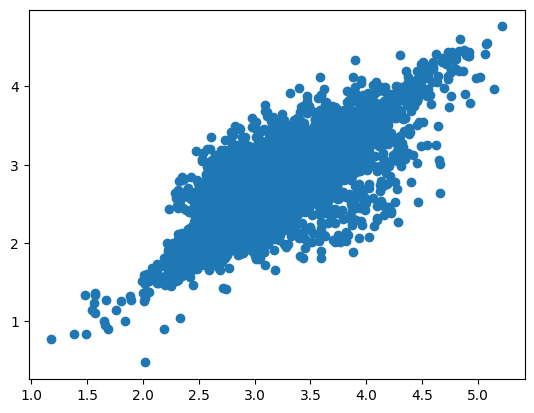

In [41]:
plt.scatter( np.log10(peak_counts_gastro[:10000]+1), np.log10(peak_counts_hippo[:10000]+1) )

In [86]:
np.sum(np.logical_and(peak_counts_gastro > lower_thres, peak_counts_gastro < upper_thres))

101166

In [44]:
peak_size = hippo.end - hippo.start

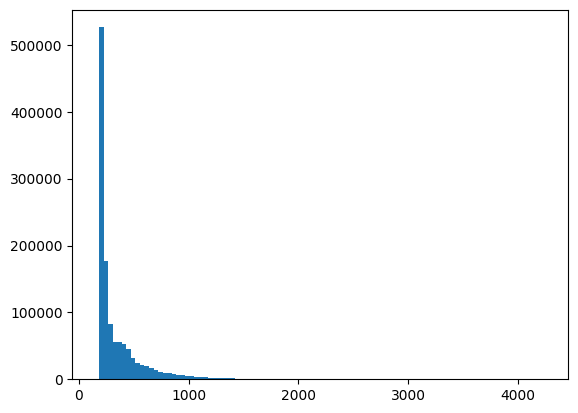

In [48]:
plt.hist(peak_size, 100)
plt.show()

Text(0, 0.5, 'log10(counts + 1)')

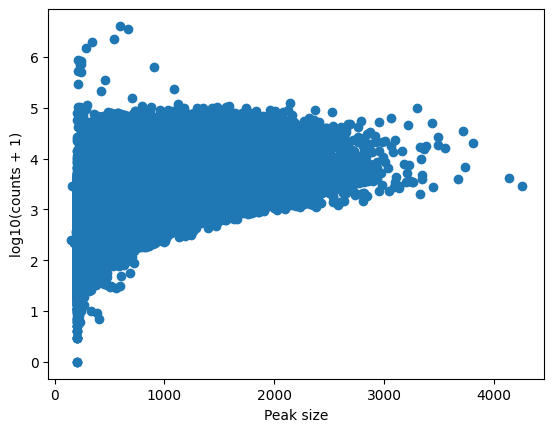

In [52]:
plt.scatter(peak_size, np.log10(peak_counts_hippo+1))
plt.xlabel("Peak size") 
plt.ylabel("log10(counts + 1)") 

In [121]:
from pathlib import Path
import re
for f in Path(".").glob("*.txt.gz"): 
    tissue = re.search(r'[0-9]-([-a-z]+)_epigen', str(f)).group(1)
    print(tissue)
    data = pd.read_csv(f, sep = "\t")
    counts = np.array(data.iloc[:,3:])
    norm = 2e8 * counts / counts.sum(0) # normalize st each sample has 20M reads
    peak_counts = norm.mean(1)
    to_keep = np.logical_and(peak_counts > lower_thres, peak_counts < upper_thres)
    chromSE = data.iloc[to_keep,:3]
    chromSE["name"]="."
    chromSE["score"] = peak_counts[to_keep].astype(int)
    chromSE.to_csv(f"{tissue}_ATAC.bed.gz", sep="\t", index=False, header=False)
    

liver
white-adipose
brown-adipose
hippocampus
gastrocnemius
lung
kidney
heart


In [ ]:
from pathlib import Path
import re
import pandas as pd
meta = []
for f in Path(".").glob("*.txt.gz"): 
    tissue = re.search(r'[0-9]-([-a-z]+)_epigen', str(f)).group(1)
    file_name = f"{tissue}_ATAC.bed.gz"
    meta.append({"tissue":tissue, "filename":file_name, "original":f})

meta = pd.DataFrame(meta)
meta["assay"] = "ATAC"
meta["species"] = "rattus_norvegicus"

meta = meta[["tissue","assay","species","filename","original"]]

meta.to_csv("meta.tsv", sep="\t", index=False)